# Quick report
Ließt Daten, die ähnlich der Datei *valuesncprogram.json* vorliegen, in ein Pandas-Dataframe ein. demo von *pandas_profiling*, das einen report über das eingegebene DataFrame ausgibt.

## TODO
* _values.json_ enthält größere verschachtelte objekte. Wie wichtig sind diese für unseren Machine Learning-Prozess?
* Generell abklären: welche daten werden tatsächlich benötigt? reduzieren der Daten auf die wichtigsten Spalten

In [7]:
import pandas as pd
# import pandas_profiling

def readMachineJSON(path, dataLike="valuesncprogram"):
    df = pd.read_json(filename,orient="records", lines=True)
    if dataLike == "valuesncprogram":
        df["_id"] = df["_id"].apply(lambda x: x["$oid"])
        df["timeStamp"] = df["timeStamp"].apply(lambda x: pd.to_datetime(x["$date"]))
        df["timeStamp"] = pd.to_datetime(df["timeStamp"])
    elif dataLike == "values":
        df["_id"] = df["_id"].apply(lambda x: x["$oid"])
        #todo machineStatusList auspacken: [{"_id":"SENSORDATA.12430012063.Channel1.Common_Machine_Data.Status_Signal_Lamp.STATUS","ValueUnit":"","Value":"false","Timestamp":{"$date":"2019-08-02T09:11:34.489Z"},"StatusId":"Signal_Lamp_RED","StatusType":"RED"},{"_id":"SENSORDATA.12430012063.Channel1.Common_Machine_Data.Status_Signal_Lamp.STATUS","ValueUnit":"","Value":"false","Timestamp":{"$date":"2019-08-02T09:11:34.534Z"},"StatusId":"Signal_Lamp_YELLOW","StatusType":"YELLOW"}]
    return df

In [8]:
filename = "valuesncprogram.json"
df = readMachineJSON(filename)
print(df.shape)
print(df.dtypes)

ValueError: Expected object or value

In [9]:
import pandas as pd
# import pandas_profiling

df = pd.read_json("dmg_values.json",orient="records", lines=True)
    #todo machineStatusList auspacken: [{"_id":"SENSORDATA.12430012063.Channel1.Common_Machine_Data.Status_Signal_Lamp.STATUS","ValueUnit":"","Value":"false","Timestamp":{"$date":"2019-08-02T09:11:34.489Z"},"StatusId":"Signal_Lamp_RED","StatusType":"RED"},{"_id":"SENSORDATA.12430012063.Channel1.Common_Machine_Data.Status_Signal_Lamp.STATUS","ValueUnit":"","Value":"false","Timestamp":{"$date":"2019-08-02T09:11:34.534Z"},"StatusId":"Signal_Lamp_YELLOW","StatusType":"YELLOW"}]

In [10]:
# Umwandlung des diffusen Datentyps in einen eindeutigen

df["_id"] = df["_id"].apply(lambda x: x["$oid"])
df["timeStamp"] = df["timeStamp"].apply(lambda x: x["$date"]).apply(lambda x: x["$numberLong"])
df["valueStatus"] = df["valueStatus"].apply(lambda x: x["$numberInt"])
df["value_number"] = df["value_number"].apply(lambda x: list(x.values())[0])
df["timeStampMqttClient"] = df["timeStampMqttClient"].apply(lambda x: x["$date"]).apply(lambda x: x["$numberLong"])

In [11]:
df.head(50)

,_id,value,valueStatus,Error,statusTyp,statusID,ValueID,machineID,channelId,ValueUnit,statusIsMachine,timeStamp,machineStatusList,value_number,componentID,timeStampMqttClient
0,5dc516968e15b329dc1341f3,0.00,0,0,GREEN,0,12430012063.Main_Spindle.Actual_Power,12430012063,Channel1,%,False,1573197461887,NaN,0,12430012063.Main_Spindle,1573197437715
1,5dc516968e15b329dc1341f1,0.00,0,0,GREEN,0,12430012063.Main_Spindle.Actual_Speed_Rate,12430012063,Channel1,RPM,False,1573197461887,NaN,0,12430012063.Main_Spindle,1573197437717
2,5dc516968e15b329dc1341f2,360.00,0,0,GREEN,0,12430012063.Main_Spindle.Actual_Position_MCS,12430012063,Channel1,Grad,False,1573197461888,NaN,360,12430012063.Main_Spindle,1573197437728
3,5dc516968e15b329dc1341f5,0.00,0,0,GREEN,0,12430012063.Main_Spindle.MPC_Veff_Total,12430012063,Channel1,mm/s,False,1573197461890,NaN,0,12430012063.Main_Spindle,1573197437715
4,5dc516968e15b329dc1341ec,0.00,0,0,GREEN,0,12430012063.C1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461891,NaN,0,12430012063.C1_Axis,1573197437715
5,5dc516968e15b329dc1341f0,0.00,0,0,GREEN,0,12430012063.A1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461892,NaN,0,12430012063.A1_Axis,1573197437673
6,5dc516968e15b329dc1341ed,0.00,0,0,GREEN,0,12430012063.X1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461894,NaN,0,12430012063.X1_Axis,1573197437673
7,5dc516968e15b329dc1341ee,0.00,0,0,GREEN,0,12430012063.Y1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461895,NaN,0,12430012063.Y1_Axis,1573197437728
8,5dc516968e15b329dc1341ef,0.00,0,0,GREEN,0,12430012063.Z1_Axis.Actual_Power,12430012063,Channel1,%,False,1573197461897,NaN,0,12430012063.Z1_Axis,1573197437722
9,5dc5167e8e15b329dc13412e,20.06,0,0,GREEN,0,12430012063.Main_Spindle.Temperature_Spindle,12430012063,Channel1,Grad,False,1573197462787,NaN,20.06,12430012063.Main_Spindle,1573197438373


In [12]:
df_csv1 = pd.read_csv("test_data_set_1.csv", header=6)
df_csv1.head()

,Zeitstempel,NC-Programm,Werkzeug,MPC Lager [mG],MPC Spitze [%],MPC Veff Gesamt [mm/s],Axialkraft Druck [kN],Axialkraft Zug [kN],Biegemoment Werkzeug [Nm]
0,2019.11.14 14:20:00.086,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.2,2
1,2019.11.14 14:20:00.548,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.3,2
2,2019.11.14 14:20:01.456,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.2,2
3,2019.11.14 14:20:02.080,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.3,2
4,2019.11.14 14:20:06.011,EINZELLOCH.MPF,MESSTASTER,NaN,0,0,0.0,0.4,2


In [13]:
df_csv2 = pd.read_csv("test_data_set_2.csv", header=6)
df_csv2.head()

,Zeitstempel,NC-Programm,Werkzeug,Power Spindle1 [W],Power X1 [W],Power Y1 [W],Power Z1 [W],Aktuelle Spindeldrehzahl [RPM],Spindeltemperatur [Grad]
0,2019.11.14 14:20:18.596,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,151.072,0,27.37
1,2019.11.14 14:20:18.659,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,147.341,0,27.37
2,2019.11.14 14:20:18.770,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,143.611,0,27.37
3,2019.11.14 14:20:18.848,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,143.611,0,27.37
4,2019.11.14 14:20:18.902,EINZELLOCH.MPF,MESSTASTER,0.0,0.0,0.0,147.341,0,27.37


In [14]:
df_csv3 = pd.read_csv("test_data_set_xy.csv", header=6)
df_csv3.head()

,Zeitstempel,NC-Programm,Werkzeug,Aktueller Vorschub [mm/min],Aktuelle Position MCS [mm],Aktuelle Leistung [%],Aktueller Vorschub [mm/min].1,Aktuelle Position MCS [mm].1,Aktuelle Leistung [%].1
0,2019.11.14 14:20:18.900,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,0,-378.57,1
1,2019.11.14 14:20:19.266,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,0,-378.57,2
2,2019.11.14 14:20:19.577,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,346,-378.57,2
3,2019.11.14 14:20:19.589,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,346,-378.53,2
4,2019.11.14 14:20:19.592,EINZELLOCH.MPF,MESSTASTER,0,351.75,0,346,-378.53,7


In [15]:
df_csv4 = pd.read_csv("test_data_set_z.csv", header=6)
df_csv4.head()

,Zeitstempel,NC-Programm,Werkzeug,Aktueller Vorschub [mm/min],Aktuelle Position MCS [mm],Aktuelle Leistung [%]
0,2019.11.14 14:20:18.148,EINZELLOCH.MPF,MESSTASTER,0,-313.74,14
1,2019.11.14 14:20:18.540,EINZELLOCH.MPF,MESSTASTER,0,-312.95,14
2,2019.11.14 14:20:18.541,EINZELLOCH.MPF,MESSTASTER,1812,-312.95,14
3,2019.11.14 14:20:18.544,EINZELLOCH.MPF,MESSTASTER,1812,-312.95,25
4,2019.11.14 14:20:18.753,EINZELLOCH.MPF,MESSTASTER,1812,-306.30,25


In [16]:
import csv

df_csv5 = pd.read_csv("MEAS_PROTOCOL_CSV_6.CSV", sep=';')
df_csv5.rename(columns=lambda x: x.strip(), inplace=True)
df_csv5["Measured"] = df_csv5["Measured"].apply(lambda x: float(str(x).replace(',','.')))
df_csv5["Setpoint"] = df_csv5["Setpoint"].apply(lambda x: float(str(x).replace(',','.')))
df_csv5["Difference"] = df_csv5["Difference"].apply(lambda x: float(str(x).replace(',','.')))
columnsToStrip = ["Program", "Plane", "Measuring variant","Results:", "Unit"]
for curColumn in columnsToStrip:
    df_csv5[curColumn] = df_csv5[curColumn].apply(lambda x: x.strip())
df_csv5.head()

,Unnamed: 0,Date,Time,Program,Workpiece no.,Testpoint,Plane,Probe no.,Cycle,S_MVAR,Measuring variant,Results:,Setpoint,Measured,Difference,Unit
0,1.0,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,X,15.000,14.999,-0.001,mm
1,NaN,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Y,15.000,14.996,-0.004,mm
2,NaN,14.11.2019,15:53:15,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Diameter,12.014,12.019,0.005,mm
3,2.0,14.11.2019,15:53:20,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,X,30.000,29.999,-0.001,mm
4,NaN,14.11.2019,15:53:20,TESTPROGRAMM.MPF,,1,G17,1,977,1,1 Hole,Y,15.000,14.998,-0.002,mm


In [17]:
df_csv5 = pd.read_csv("Achsleistung-2019-11-14T14-24-47.csv", sep=';')
df_csv5.head()

,Timestamp,X1,Y1,Z1,C1,A1,SPI1,WZM,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,"2019-11-14T14:24:47,176",83.473,110.304,3452.503,1217.848,1189.304,554.121,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"2019-11-14T14:24:47,188",83.473,110.304,3452.503,1217.848,1189.304,554.121,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"2019-11-14T14:24:47,189",79.921,93.876,3450.010,1211.505,1186.133,1682.152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"2019-11-14T14:24:47,190",81.697,103.263,3452.503,1208.333,1186.133,1517.235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"2019-11-14T14:24:47,192",81.697,103.263,3452.503,1208.333,1186.133,1517.235,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
!pip install matplotlib

In [19]:
dfX = df.loc[lambda x: x["ValueID"]=="12430012063.X1_Axis.Actual_Position_MCS", ["ValueID", "value", "timeStamp"]]
dfX.head(10)

,ValueID,value,timeStamp
12,12430012063.X1_Axis.Actual_Position_MCS,1.56,1573197462948
392,12430012063.X1_Axis.Actual_Position_MCS,1.55,1573197509018
400,12430012063.X1_Axis.Actual_Position_MCS,1.56,1573197509825
407,12430012063.X1_Axis.Actual_Position_MCS,1.55,1573197510667
746,12430012063.X1_Axis.Actual_Position_MCS,36.11,1573197720951
767,12430012063.X1_Axis.Actual_Position_MCS,116.11,1573197721123
782,12430012063.X1_Axis.Actual_Position_MCS,196.11,1573197721289
798,12430012063.X1_Axis.Actual_Position_MCS,276.11,1573197721491
814,12430012063.X1_Axis.Actual_Position_MCS,356.11,1573197721686
828,12430012063.X1_Axis.Actual_Position_MCS,436.11,1573197721891


In [20]:
dfY = df.loc[lambda x: x["ValueID"]=="12430012063.Y1_Axis.Actual_Position_MCS", ["ValueID", "value", "timeStamp"]]
dfY.head(10)

,ValueID,value,timeStamp
749,12430012063.Y1_Axis.Actual_Position_MCS,-617.85,1573197720954
770,12430012063.Y1_Axis.Actual_Position_MCS,-546.62,1573197721145
784,12430012063.Y1_Axis.Actual_Position_MCS,-475.38,1573197721291
800,12430012063.Y1_Axis.Actual_Position_MCS,-404.15,1573197721493
816,12430012063.Y1_Axis.Actual_Position_MCS,-332.92,1573197721687
829,12430012063.Y1_Axis.Actual_Position_MCS,-261.68,1573197721892
843,12430012063.Y1_Axis.Actual_Position_MCS,-190.45,1573197722113
859,12430012063.Y1_Axis.Actual_Position_MCS,-119.22,1573197722330
872,12430012063.Y1_Axis.Actual_Position_MCS,-47.99,1573197722496
894,12430012063.Y1_Axis.Actual_Position_MCS,-0.16,1573197722697


In [21]:
import matplotlib.pyplot as plt

plt.plot(dfX["value"]) 
# plt.plot(dfY)
plt.ylabel('dfX')
plt.show()

<Figure size 640x480 with 1 Axes>

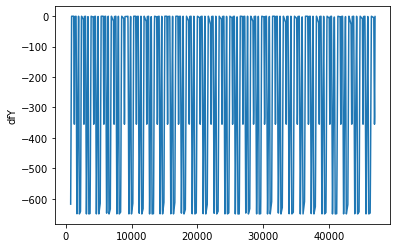

In [22]:
plt.plot(dfY["value"])
plt.ylabel('dfY')
plt.show()

<class 'pandas.core.series.Series'>


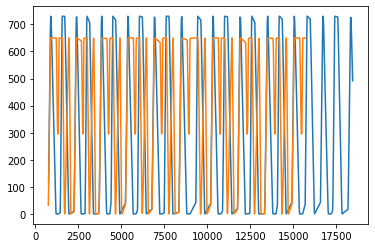

In [23]:
print(type(dfX["value"]))

fig, ax = plt.subplots()
ax.plot(dfX["value"][5:805]) 
ax.plot(dfY["value"][:800] - min(dfY["value"][:800]))
plt.show()

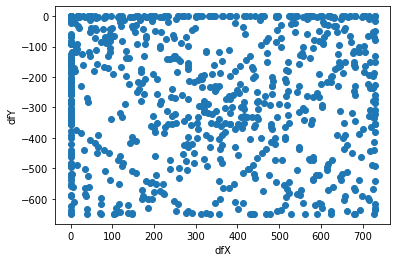

In [24]:
plt.scatter(dfX["value"][5:805], dfY["value"][:800])
plt.xlabel('dfX')
plt.ylabel('dfY')
plt.show()

In [25]:
def matching_over_timestamps(dataframeX, dataframeY, toleranz):
    df = pd.DataFrame([], [], columns=list('XY'))
    
    indices_x = list(range(len(dataframeX)))
    indices_y = list(range(len(dataframeY)))
    
    # reset indices of dataframes
    dataframeX = dataframeX.reset_index(drop=True)
    dataframeY = dataframeY.reset_index(drop=True)
    
    # print(dataframeX["timeStamp"][0], dataframeY["timeStamp"])
    
    for idx_dfX in range(len(dataframeX)):
        for idx_dfY in range(len(dataframeY)):
            
            diff = abs(int(dataframeX["timeStamp"][idx_dfX]) - int(dataframeY["timeStamp"][idx_dfY]))
            
            if (diff <= toleranz):
                df_append = pd.DataFrame([[dataframeX["value"][idx_dfX], dataframeY["value"][idx_dfY]]], columns=list('XY'))
                # df = df.append({'X': dataframeX["value"][idx_dfX]}, ignore_index=True)
                # df = df.append({'Y': dataframeY["value"][idx_dfY]}, ignore_index=True)
                df = df.append(df_append, ignore_index=True)
                
    print(df)
    return df    

In [26]:
timematching = matching_over_timestamps(dfX, dfY, 200)

           X       Y
0      36.11 -617.85
1      36.11 -546.62
2     116.11 -617.85
3     116.11 -546.62
4     116.11 -475.38
...      ...     ...
2766    0.52 -170.07
2767    0.75  -90.07
2768    0.97  -90.07
2769    0.97  -12.12
2770    1.00   -1.00

[2771 rows x 2 columns]


In [27]:
print(timematching)

           X       Y
0      36.11 -617.85
1      36.11 -546.62
2     116.11 -617.85
3     116.11 -546.62
4     116.11 -475.38
...      ...     ...
2766    0.52 -170.07
2767    0.75  -90.07
2768    0.97  -90.07
2769    0.97  -12.12
2770    1.00   -1.00

[2771 rows x 2 columns]


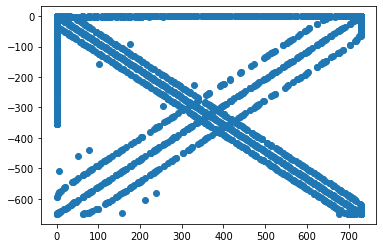

In [28]:
plt.scatter(timematching["X"], timematching["Y"])
plt.show()